In [416]:
import pandas as pd
from pathlib import Path

In [417]:
def read_dataset(folder, file, date_col=None):
    
    df = pd.read_csv(folder / file, 
                     index_col=date_col, 
                     parse_dates=[date_col])
    return df

In [418]:
a= read_dataset(Path('data'),Path('machine_temp_failure_missing.csv'),'timestamp')
b= read_dataset(Path('data'),Path('machine_temp_failure_original.csv'),'timestamp')

In [419]:
print(a)

                      value
timestamp                  
02-12-2013 21:15  73.967322
02-12-2013 21:20  74.935882
02-12-2013 21:25  76.124162
02-12-2013 21:30  78.140707
02-12-2013 21:35  79.329836
...                     ...
19-02-2014 15:05  98.185415
19-02-2014 15:10  97.804168
19-02-2014 15:15  97.135468
19-02-2014 15:20  98.056852
19-02-2014 15:25  96.903861

[22695 rows x 1 columns]


In [420]:
a.describe()

,value
count,21410.000000
mean,85.968188
std,13.553070
min,2.084721
25%,83.082867
50%,89.251290
75%,93.910748
max,108.510543


In [421]:
a.isnull().values.any()

True

In [422]:
a.isnull().sum()

value    1285
dtype: int64

In [423]:
a.columns=['temperature']
a['temperature']

timestamp
02-12-2013 21:15    73.967322
02-12-2013 21:20    74.935882
02-12-2013 21:25    76.124162
02-12-2013 21:30    78.140707
02-12-2013 21:35    79.329836
                      ...    
19-02-2014 15:05    98.185415
19-02-2014 15:10    97.804168
19-02-2014 15:15    97.135468
19-02-2014 15:20    98.056852
19-02-2014 15:25    96.903861
Name: temperature, Length: 22695, dtype: float64

In [424]:
b.columns=['temperature']
b['temperature']

timestamp
2013-12-02 21:15:00    73.967322
2013-12-02 21:20:00    74.935882
2013-12-02 21:25:00    76.124162
2013-12-02 21:30:00    78.140707
2013-12-02 21:35:00    79.329836
                         ...    
2014-02-19 15:05:00    98.185415
2014-02-19 15:10:00    97.804168
2014-02-19 15:15:00    97.135468
2014-02-19 15:20:00    98.056852
2014-02-19 15:25:00    96.903861
Name: temperature, Length: 22695, dtype: float64

In [425]:
i=0
delta_temperature=[]
delta_temperature.append(0)
while i<22694 :
    delta_temperature.append(a['temperature'][i+1]-a['temperature'][i])
    i=i+1
a['delta_temperature'] = delta_temperature
a

,temperature,delta_temperature
timestamp,,
02-12-2013 21:15,73.967322,0.000000
02-12-2013 21:20,74.935882,0.968560
02-12-2013 21:25,76.124162,1.188280
02-12-2013 21:30,78.140707,2.016546
02-12-2013 21:35,79.329836,1.189128
...,...,...
19-02-2014 15:05,98.185415,NaN
19-02-2014 15:10,97.804168,-0.381246
19-02-2014 15:15,97.135468,-0.668700


In [426]:
import matplotlib.pyplot as plt

In [427]:
a.index=pd.to_datetime(a.index, format='%d-%m-%Y %H:%M')

Text(0, 0.5, 'Temperature')

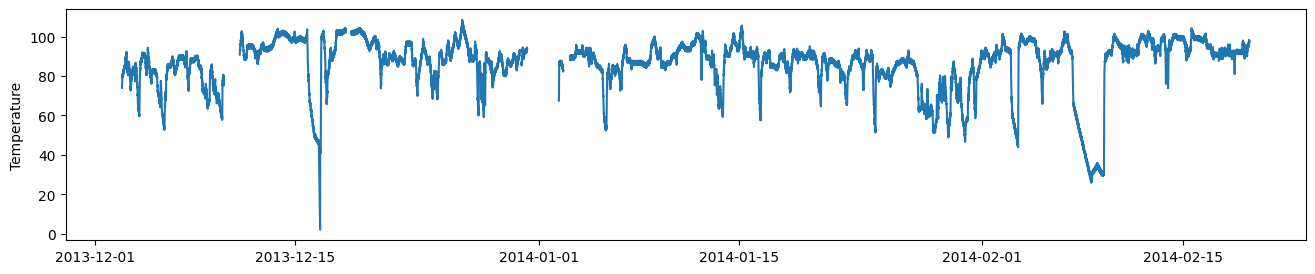

In [428]:
plt.plot( a['temperature'])
plt.ylabel('Temperature')

Text(0, 0.5, 'delta_temperature')

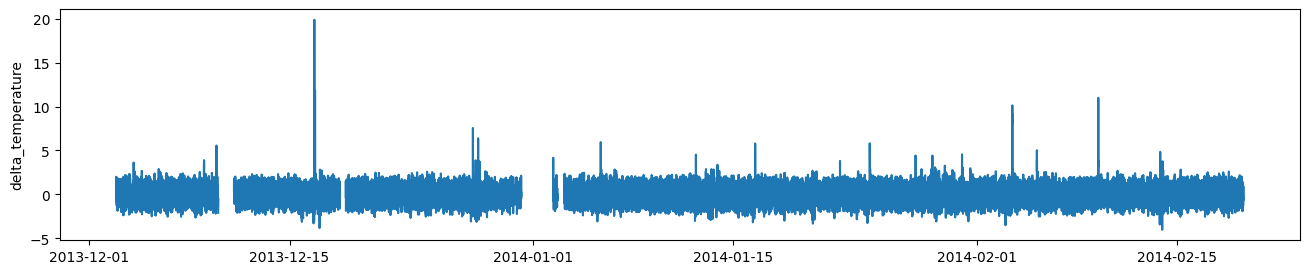

In [429]:
plt.plot(a['delta_temperature'])
plt.ylabel('delta_temperature') 

In [430]:
import hvplot.pandas
import numpy as np

In [431]:
a.hvplot(width=1000, subplots=True).cols(1)

:NdLayout   [Variable]
   :Curve   [timestamp]   (value)

In [432]:
folder=Path('data')
file=Path('machine_temp_failure_original.csv')
read_dataset(folder , file, 'timestamp')

,value
timestamp,
2013-12-02 21:15:00,73.967322
2013-12-02 21:20:00,74.935882
2013-12-02 21:25:00,76.124162
2013-12-02 21:30:00,78.140707
2013-12-02 21:35:00,79.329836
...,...
2014-02-19 15:05:00,98.185415
2014-02-19 15:10:00,97.804168
2014-02-19 15:15:00,97.135468


In [433]:
def plot_dfs(df1, df2, col, title=None, xlabel=None, ylabel=None):
    '''	
    df1: original dataframe without missing data
    df2: dataframe with missing data
    col: column name that contains missing data
    '''    
    df_missing = df2.rename(columns={col: 'missing'})
    
    columns = df_missing.loc[:, 'missing':].columns.tolist()
    subplots_size = len(columns)
    
    # subplots_size = df2.shape[1]
    fig, ax = plt.subplots(subplots_size+1, 1, sharex=True)
    plt.subplots_adjust(hspace=0.25)
    fig.suptitle = title 
    
    df1[col].plot(ax=ax[0], figsize=(10, 16))
    ax[0].set_title('Original Dataset')
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel(ylabel)    
    
    for i, colname in enumerate(columns):
        df_missing[colname].plot(ax=ax[i+1])
        ax[i+1].set_title(colname)

    plt.show()

In [434]:
def rmse_score(df1, df2, col=None):
    '''
    df1: original dataframe without missing data
    df2: dataframe with missing data
    col: column name that contains missing data

    returns: a list of scores
    '''
    df_missing = df2.rename(columns={col: 'missing'})
    columns = df_missing.loc[:, 'missing':].columns.tolist()
    scores = []
    for comp_col in columns[1:]:
        rmse = np.sqrt(np.mean((df1[col] - df_missing[comp_col])**2))
        scores.append(rmse)
        print(f'RMSE for {comp_col}: {rmse}')
    return scores

In [435]:
a['ffill'] = a['temperature'].fillna(method='ffill')
a['bfill'] = a['temperature'].fillna(method='bfill')
a['mean'] = a['temperature'].fillna(a['temperature'].mean())

In [436]:
a.index=pd.to_datetime(a.index, format='%d-%m-%Y %H:%M')

In [437]:
a['temperature']

timestamp
2013-12-02 21:15:00    73.967322
2013-12-02 21:20:00    74.935882
2013-12-02 21:25:00    76.124162
2013-12-02 21:30:00    78.140707
2013-12-02 21:35:00    79.329836
                         ...    
2014-02-19 15:05:00    98.185415
2014-02-19 15:10:00    97.804168
2014-02-19 15:15:00    97.135468
2014-02-19 15:20:00    98.056852
2014-02-19 15:25:00    96.903861
Name: temperature, Length: 22695, dtype: float64

In [438]:
b['temperature']

timestamp
2013-12-02 21:15:00    73.967322
2013-12-02 21:20:00    74.935882
2013-12-02 21:25:00    76.124162
2013-12-02 21:30:00    78.140707
2013-12-02 21:35:00    79.329836
                         ...    
2014-02-19 15:05:00    98.185415
2014-02-19 15:10:00    97.804168
2014-02-19 15:15:00    97.135468
2014-02-19 15:20:00    98.056852
2014-02-19 15:25:00    96.903861
Name: temperature, Length: 22695, dtype: float64

In [439]:
_ = rmse_score(b, a, 'temperature')

RMSE for delta_temperature: 87.02520124648228
RMSE for ffill: 2.4939956524274454
RMSE for bfill: 5.873128567455812
RMSE for mean: 3.961536496226712


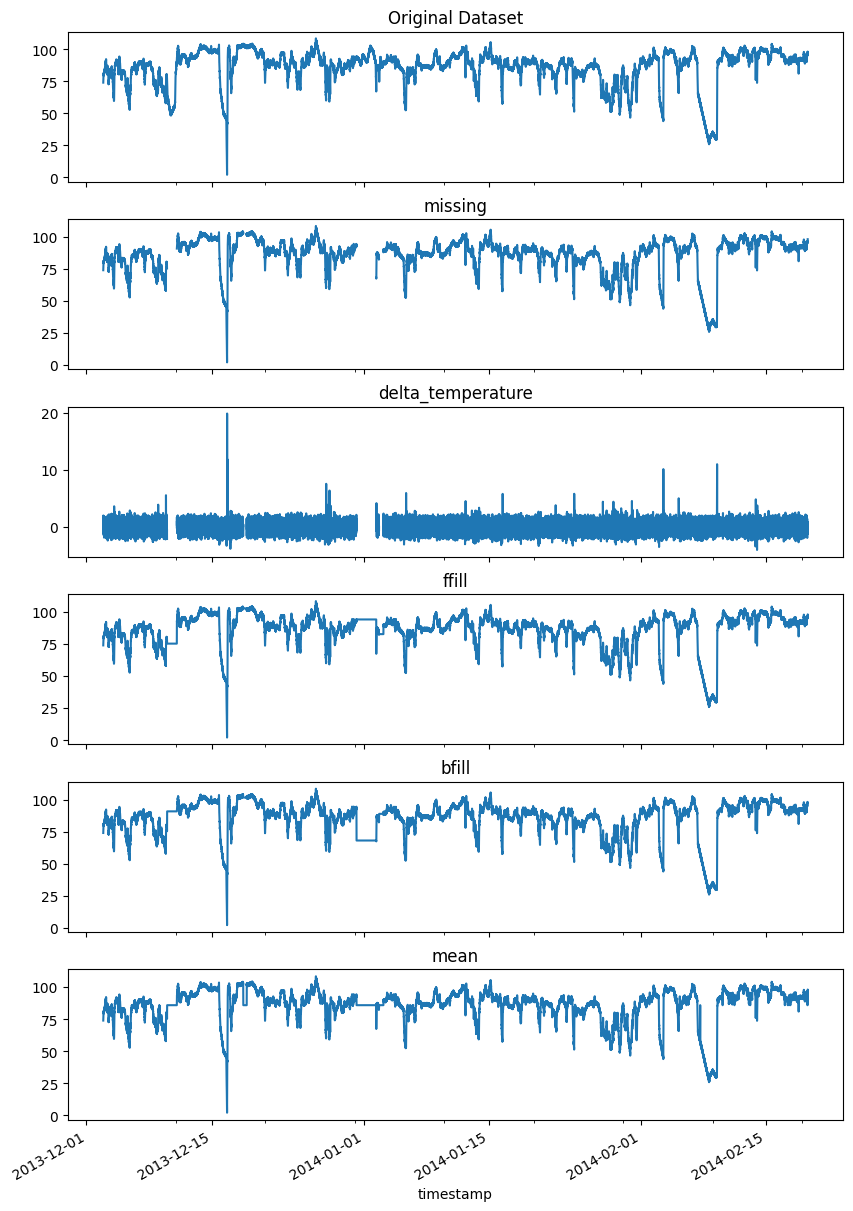

In [440]:
plot_dfs(b, a, 'temperature')

In [441]:
from sklearn.impute import SimpleImputer

In [442]:
strategy = [
    ('Mean Strategy', 'mean'),
    ('Median Strategy', 'median'),
    ('Most Frequent Strategy', 'most_frequent')]

co2_vals = a['temperature'].values.reshape(-1,1)

for s_name, s in strategy:
    a[s_name] = (
        SimpleImputer(strategy=s).fit_transform(co2_vals))

In [443]:
_ = rmse_score(b, a, 'temperature')

RMSE for delta_temperature: 87.02520124648228
RMSE for ffill: 2.4939956524274454
RMSE for bfill: 5.873128567455812
RMSE for mean: 3.961536496226712
RMSE for Mean Strategy: 3.961536496226712
RMSE for Median Strategy: 4.071585793081295
RMSE for Most Frequent Strategy: 20.176855010139285


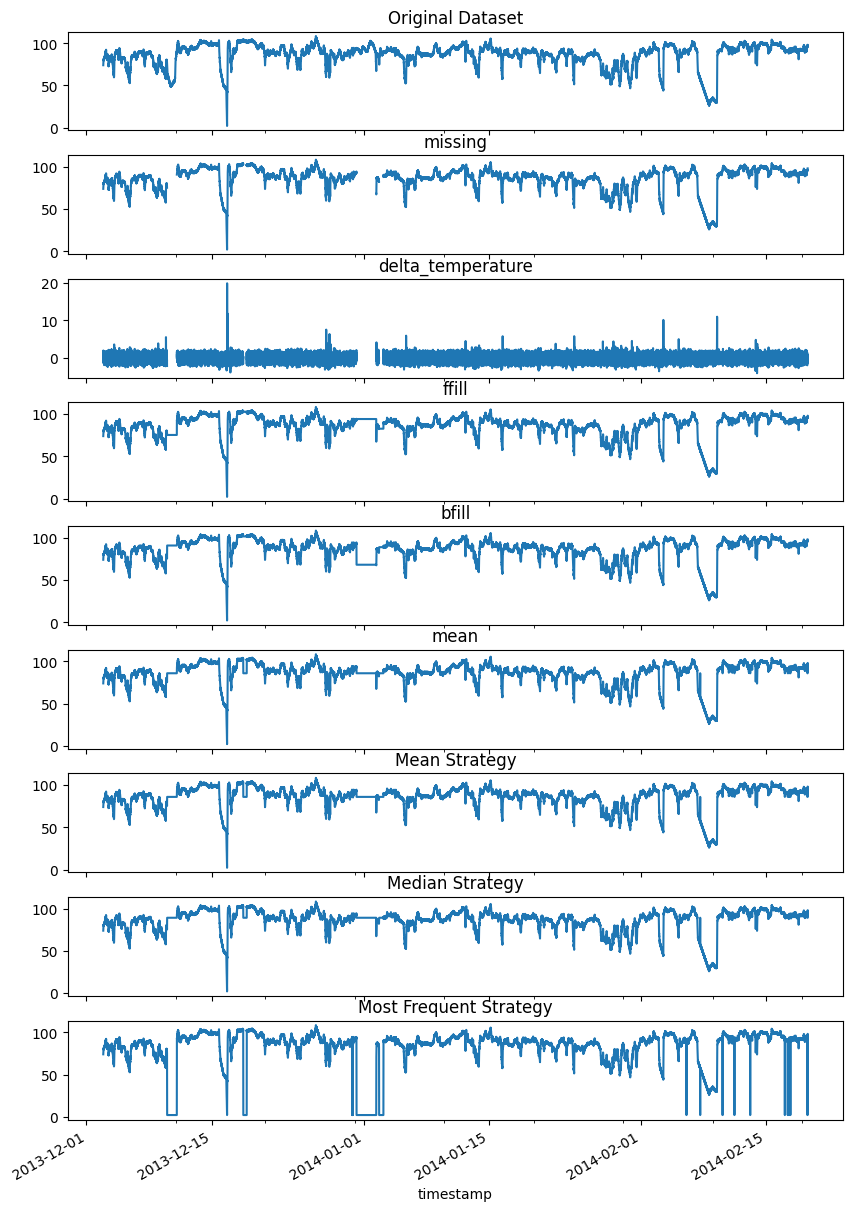

In [444]:
plot_dfs(b, a, 'temperature')

In [445]:
interpolations = [
    'linear',
    'nearest'
]

for intp in interpolations:
    a[intp] = a['temperature'].interpolate(method=intp)

In [446]:
_ = rmse_score(b, a, 'temperature')

RMSE for delta_temperature: 87.02520124648228
RMSE for ffill: 2.4939956524274454
RMSE for bfill: 5.873128567455812
RMSE for mean: 3.961536496226712
RMSE for Mean Strategy: 3.961536496226712
RMSE for Median Strategy: 4.071585793081295
RMSE for Most Frequent Strategy: 20.176855010139285
RMSE for linear: 4.043203597694257
RMSE for nearest: 4.538509533797259


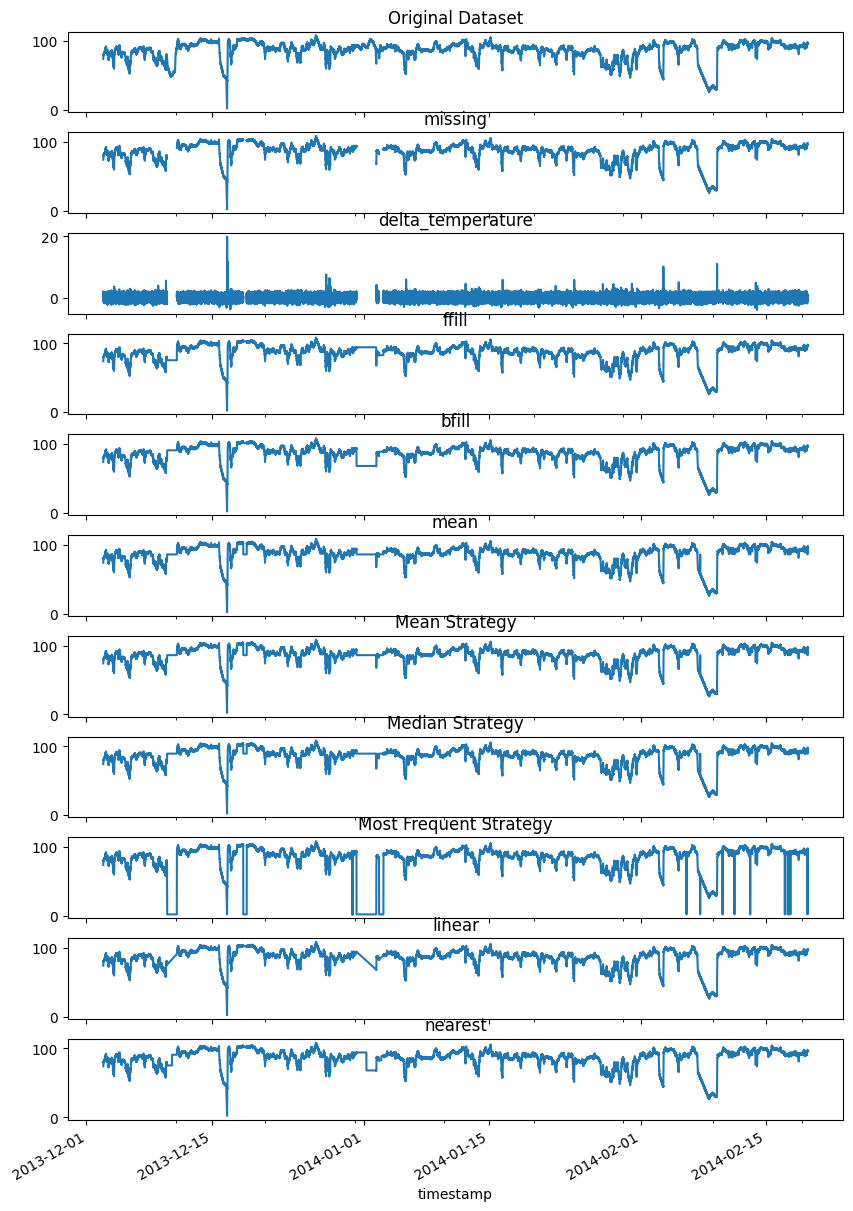

In [447]:
plot_dfs(b, a, 'temperature')

In [448]:
import warnings, scipy, statsmodels
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = 16, 3

In [449]:
c=a[['ffill']].copy()
c.columns=['temperature']
c


,temperature
timestamp,
2013-12-02 21:15:00,73.967322
2013-12-02 21:20:00,74.935882
2013-12-02 21:25:00,76.124162
2013-12-02 21:30:00,78.140707
2013-12-02 21:35:00,79.329836
...,...
2014-02-19 15:05:00,98.185415
2014-02-19 15:10:00,97.804168
2014-02-19 15:15:00,97.135468


In [450]:
print("Frequency : {}".format(c.index.freq))
c

Frequency : None


,temperature
timestamp,
2013-12-02 21:15:00,73.967322
2013-12-02 21:20:00,74.935882
2013-12-02 21:25:00,76.124162
2013-12-02 21:30:00,78.140707
2013-12-02 21:35:00,79.329836
...,...
2014-02-19 15:05:00,98.185415
2014-02-19 15:10:00,97.804168
2014-02-19 15:15:00,97.135468


In [451]:
c=c.resample('H').mean()

In [452]:
print("Frequency : {}".format(c.index.freq))
c

Frequency : <Hour>


,temperature
timestamp,
2013-12-02 21:00:00,78.011596
2013-12-02 22:00:00,80.598012
2013-12-02 23:00:00,81.625018
2013-12-03 00:00:00,82.965454
2013-12-03 01:00:00,84.529097
...,...
2014-02-19 11:00:00,91.099335
2014-02-19 12:00:00,93.116737
2014-02-19 13:00:00,94.732478


In [453]:
import seaborn as sns

<Axes: xlabel='temperature'>

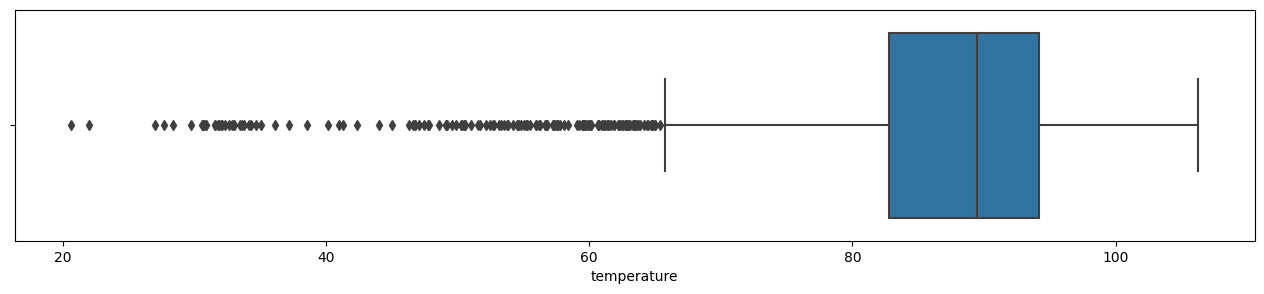

In [454]:
sns.boxplot(x=c['temperature'],whis=1.5)

<Axes: xlabel='temperature'>

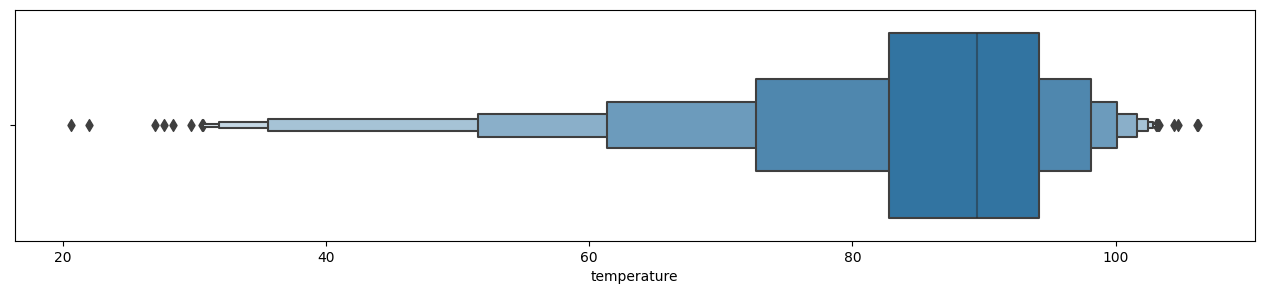

In [455]:

sns.boxenplot(x=c['temperature'])

In [456]:
from pandas.plotting import lag_plot

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

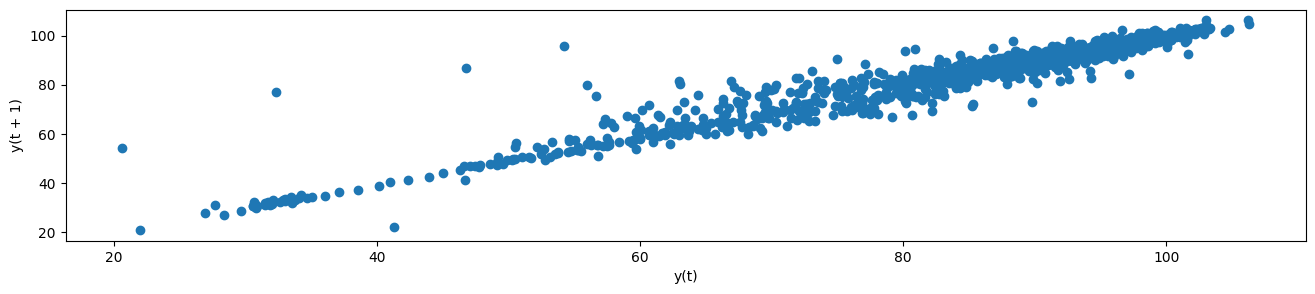

In [457]:
lag_plot(c['temperature'], lag=1)

In [458]:
def iqr_outliers(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_fence = q1 - (1.5 * iqr)
    upper_fence = q3 + (1.5 * iqr)
    return data[(data[column] < lower_fence) | (data[column] > upper_fence)]

In [459]:
c

,temperature
timestamp,
2013-12-02 21:00:00,78.011596
2013-12-02 22:00:00,80.598012
2013-12-02 23:00:00,81.625018
2013-12-03 00:00:00,82.965454
2013-12-03 01:00:00,84.529097
...,...
2014-02-19 11:00:00,91.099335
2014-02-19 12:00:00,93.116737
2014-02-19 13:00:00,94.732478


In [460]:
iqr_outliers(c,'temperature')

,temperature
timestamp,
2013-12-04 00:00:00,64.696206
2013-12-04 01:00:00,61.532599
2013-12-05 16:00:00,61.150198
2013-12-05 17:00:00,59.192719
2013-12-05 18:00:00,57.223873
...,...
2014-02-09 07:00:00,30.880488
2014-02-09 08:00:00,30.632596
2014-02-09 09:00:00,30.583324


In [461]:
c['zscore'] = (c['temperature'] - c['temperature'].mean())/c['temperature'].std()
outliers = c['temperature'][(c['zscore'] <= -3) | (c['zscore'] >= 3)]
outliers

timestamp
2013-12-16 15:00:00    41.296139
2013-12-16 16:00:00    22.004861
2013-12-16 17:00:00    20.641281
2014-02-08 00:00:00    45.034125
2014-02-08 01:00:00    43.997628
2014-02-08 02:00:00    42.390317
2014-02-08 03:00:00    41.009979
2014-02-08 04:00:00    40.183183
2014-02-08 05:00:00    38.557390
2014-02-08 06:00:00    37.155092
2014-02-08 07:00:00    36.099969
2014-02-08 08:00:00    34.692096
2014-02-08 09:00:00    33.584924
2014-02-08 10:00:00    31.861333
2014-02-08 11:00:00    30.854021
2014-02-08 12:00:00    29.705266
2014-02-08 13:00:00    28.383913
2014-02-08 14:00:00    26.971556
2014-02-08 15:00:00    27.713841
2014-02-08 16:00:00    30.747107
2014-02-08 17:00:00    31.530577
2014-02-08 18:00:00    31.766454
2014-02-08 19:00:00    32.102772
2014-02-08 20:00:00    32.880638
2014-02-08 21:00:00    33.001181
2014-02-08 22:00:00    33.455492
2014-02-08 23:00:00    34.279178
2014-02-09 00:00:00    35.088183
2014-02-09 01:00:00    34.127449
2014-02-09 02:00:00    33.797831


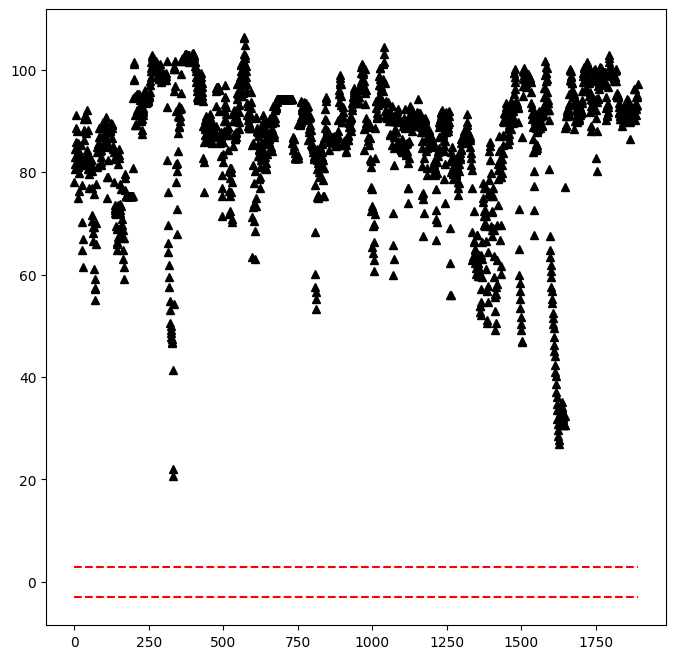

In [462]:
n = len(c['temperature'].values)
plt.figure(figsize=(8,8))
plt.plot(c['temperature'].values,'k^')
plt.plot([0,n],[3,3],'r--')
plt.plot([0,n],[-3,-3],'r--')